<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl, seaborn as sns
import pcmdpy as ppy
%matplotlib inline

GPU acceleration not available, sorry
No module named 'pycuda'


In [2]:
sns.set_context('poster')

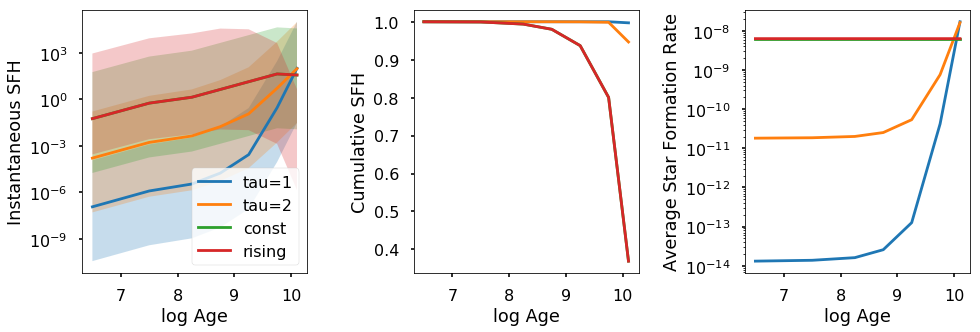

In [9]:
logNpix = 2.
d_lower = 3.5
d_upper = 3.0
step = -1
fig, axes = plt.subplots(ncols=3, figsize=(14, 5))
a1 = ppy.agemodels.TauModel(np.array([logNpix, 1.]), iso_step=step)
a1.lower = ppy.agemodels.TauModel(np.array([logNpix-d_lower, 1.]), iso_step=step).SFH
a1.upper = ppy.agemodels.TauModel(np.array([logNpix+d_upper, 1.]), iso_step=step).SFH
a2 = ppy.agemodels.TauModel(np.array([logNpix, 2.]), iso_step=step)
a2.lower = ppy.agemodels.TauModel(np.array([logNpix-d_lower, 2.]), iso_step=step).SFH
a2.upper = ppy.agemodels.TauModel(np.array([logNpix+d_upper, 2.]), iso_step=step).SFH
a3 = ppy.agemodels.ConstantSFR(np.array([logNpix]), iso_step=step)
a3.lower = ppy.agemodels.ConstantSFR(np.array([logNpix-d_lower]), iso_step=step).SFH
a3.upper = ppy.agemodels.ConstantSFR(np.array([logNpix+d_upper]), iso_step=step).SFH
# a4 = ppy.agemodels.RisingTau(np.array([logNpix, 100.]), iso_step=step)
a4 = ppy.agemodels.TauModel(np.array([logNpix, 1e10]), iso_step=step)
a4.lower = ppy.agemodels.TauModel(np.array([logNpix-d_lower, -1.]), iso_step=step).SFH
a4.upper = ppy.agemodels.TauModel(np.array([logNpix+d_upper, -1.]), iso_step=step).SFH
for t, a in zip(['tau=1', 'tau=2', 'const', 'rising'],[a1, a2, a3, a4]):
    axes[0].fill_between(a.ages, y1=a.lower, y2=a.upper, alpha=0.25)
    axes[0].plot(a.ages, a.SFH, ls='-', label=t)
    blah = a.SFH / a.Npix
    inv_cum_sum = np.cumsum(blah[::-1])[::-1]
#     axes[1].plot(a.ages, a.get_cum_sfh(), ls='-', label=t)
    axes[1].plot(a.ages, inv_cum_sum, ls='-', label=t)
    delta_t = np.diff(10.**a.default_edges)
    ave_sfh = a.SFH / delta_t
    axes[2].plot(a.ages, ave_sfh, ls='-', label=t)
axes[0].set_yscale('log')#, axes[1].set_yscale('log')
axes[2].set_yscale('log')
axes[0].set_ylabel('Instantaneous SFH'), axes[1].set_ylabel('Cumulative SFH'), axes[2].set_ylabel('Average Star Formation Rate')
axes[0].set_xlabel('log Age'), axes[1].set_xlabel('log Age'), axes[2].set_xlabel('log Age')
axes[0].legend(loc=0)
plt.tight_layout()

In [10]:
a3.SFH

array([ 0.05678974,  0.56789744,  1.36439106,  4.31458336, 13.64391058,
       43.14583362, 36.9065942 ])

In [12]:
a4.SFH - a3.SFH

array([ 1.06532688e-05, -5.55492380e-06, -4.59871271e-06,  5.09328080e-06,
       -3.95427258e-06,  8.89995347e-06, -1.05385940e-05])

In [4]:
lower_sfh = ppy.agemodels.TauModel(np.array([0.5, 1.]), iso_step=-1).SFH
upper_sfh = ppy.agemodels.TauModel(np.array([3.0, 1.]), iso_step=-1).SFH
sfh_bounds_arr = np.array([lower_sfh, upper_sfh]).T
a = list(list(b) for b in sfh_bounds_arr)

In [5]:
ppy.galaxy.DefaultNonParam.get_flat_prior(age_bounds=a)